# pandas

Un outils de manipulation de tableau hétérogène.

Il permet de manipule de grand tableau avec des label pour les lignes et les colonnes.

Très adapté aux stats.

L'idée vient de language R.

DataFrame = Tableau de data 2D

Series = colonne de data 1D



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Series = 1D

In [2]:
s = pd.Series([7, 'yep', 'yop', 20.60])
s

0       7
1     yep
2     yop
3    20.6
dtype: object

In [3]:
s = pd.Series(['sam', 'garcia', 75000.],
              index=['prenom', 'nom', 'salaire_annuel'])
s

prenom               sam
nom               garcia
salaire_annuel     75000
dtype: object

In [4]:
s['nom']

'garcia'

In [5]:
s['nom'] = 'Garcia'
s

prenom               sam
nom               Garcia
salaire_annuel     75000
dtype: object

In [6]:
s.values

array(['sam', 'Garcia', 75000.0], dtype=object)

In [7]:
s.index

Index(['prenom', 'nom', 'salaire_annuel'], dtype='object')

In [8]:
# Filtrage

In [9]:
d = {'OFC':10., 'PRL' : 50., 'APC' : 12.46, 'CA1': np.nan, 'DG':  20.6}
nb_cell = pd.Series(d)
print(nb_cell)



OFC    10.00
PRL    50.00
APC    12.46
CA1      NaN
DG     20.60
dtype: float64


In [10]:
nb_cell[nb_cell>15.]

PRL    50.0
DG     20.6
dtype: float64

In [11]:
over_thresh = nb_cell>15.
over_thresh

OFC    False
PRL     True
APC    False
CA1    False
DG      True
dtype: bool

In [12]:
'DG' in nb_cell

True

 ## c'est comme numpy : opérateur possible

In [13]:
square = nb_cell**2
square

OFC     100.0000
PRL    2500.0000
APC     155.2516
CA1          NaN
DG      424.3600
dtype: float64

In [14]:
zscore = (nb_cell-nb_cell.mean())/nb_cell.std()
zscore

OFC   -0.721318
PRL    1.453783
APC   -0.587549
CA1         NaN
DG    -0.144916
dtype: float64

## missing values

In [15]:
nb_cell.isnull()

OFC    False
PRL    False
APC    False
CA1     True
DG     False
dtype: bool

In [16]:
nb_cell.notnull()

OFC     True
PRL     True
APC     True
CA1    False
DG      True
dtype: bool

In [17]:
nb_cell[nb_cell.notnull()]

OFC    10.00
PRL    50.00
APC    12.46
DG     20.60
dtype: float64

# DataFrame = 2D

C'est un tableau avec chaque colonne = une Series



In [18]:
data = {
    'name':['alex', 'sam', 'david'],
    'sex' : [ 'F', 'M', 'M'],
    'alcohol_consumption' : [False, True, True],
    'drug_consumption' : [True, np.nan,  False],
    'coding_level' : [ 83.5, 100., 19.3],
}

formateur = pd.DataFrame(data, columns=['name', 'sex', 'alcohol_consumption', 'drug_consumption', 'coding_level'])
formateur




,name,sex,alcohol_consumption,drug_consumption,coding_level
0,alex,F,False,True,83.5
1,sam,M,True,NaN,100.0
2,david,M,True,False,19.3


index plus explicit

In [19]:
formateur.index = ['ac', 'sg',  'dm']
formateur

,name,sex,alcohol_consumption,drug_consumption,coding_level
ac,alex,F,False,True,83.5
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3


# inspection

In [20]:
formateur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, ac to dm
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 3 non-null      object 
 1   sex                  3 non-null      object 
 2   alcohol_consumption  3 non-null      bool   
 3   drug_consumption     2 non-null      object 
 4   coding_level         3 non-null      float64
dtypes: bool(1), float64(1), object(3)
memory usage: 123.0+ bytes


In [21]:
formateur.dtypes

name                    object
sex                     object
alcohol_consumption       bool
drug_consumption        object
coding_level           float64
dtype: object

In [22]:
formateur.columns

Index(['name', 'sex', 'alcohol_consumption', 'drug_consumption',
       'coding_level'],
      dtype='object')

In [23]:
formateur.index

Index(['ac', 'sg', 'dm'], dtype='object')

In [24]:
formateur.describe()

,coding_level
count,3.000000
mean,67.600000
std,42.634845
min,19.300000
25%,51.400000
50%,83.500000
75%,91.750000
max,100.000000


## selectionner une colone

par dict ou attribut

In [25]:
print(formateur['name'])
print(formateur.name)
print(type(formateur.name))

ac     alex
sg      sam
dm    david
Name: name, dtype: object
ac     alex
sg      sam
dm    david
Name: name, dtype: object
<class 'pandas.core.series.Series'>


## selectionner plusieurs colonnes

In [26]:
formateur[['alcohol_consumption', 'drug_consumption']]


,alcohol_consumption,drug_consumption
ac,False,True
sg,True,NaN
dm,True,False


## la vrai syntax pour selectionner : DataFrame.loc[]

In [27]:
# colonne
formateur.loc[:, ['alcohol_consumption', 'drug_consumption']]

,alcohol_consumption,drug_consumption
ac,False,True
sg,True,NaN
dm,True,False


In [28]:
# ligne
formateur.loc[['sg', 'dm'], :]

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3


In [29]:
formateur.loc[['sg', 'dm'], ['alcohol_consumption', 'drug_consumption']]

,alcohol_consumption,drug_consumption
sg,True,NaN
dm,True,False


## syntax pour selectionner par compteur : DataFrame.iloc[]

C'est comme numpy en 2D!!!

In [30]:
# colonne
formateur.loc[:, ['alcohol_consumption', 'drug_consumption']]
formateur.iloc[:, 2:4]


,alcohol_consumption,drug_consumption
ac,False,True
sg,True,NaN
dm,True,False


In [31]:
# ligne
formateur.iloc[::2, :]

,name,sex,alcohol_consumption,drug_consumption,coding_level
ac,alex,F,False,True,83.5
dm,david,M,True,False,19.3


In [32]:
formateur.iloc[::2, 2:4]

,alcohol_consumption,drug_consumption
ac,False,True
dm,True,False


## selectioner par condition





In [33]:
f = formateur[formateur['coding_level']>80.]
f = formateur[formateur.coding_level>80.]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
ac,alex,F,False,True,83.5
sg,sam,M,True,NaN,100.0


In [34]:
f = formateur[formateur.alcohol_consumption]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3


In [35]:
f = formateur[formateur.drug_consumption.isnull()]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,sam,M,True,NaN,100.0


# lecure depuis fichier : XLS, CSV, (database, clipboard, ...)

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html#pandas.read_excel


In [36]:

data = pd.read_csv('./data/dataset_titanic.csv', sep=',', header=0, encoding='utf8')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
data = pd.read_excel('./data/dataset_titanic.xlsx', sheet_name='train')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
#data = data.set_index('PassengerId')
data.set_index('PassengerId', inplace=True)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# export vers excel

In [40]:
data = {
    'name':['alex', 'sam', 'david'],
    'sex' : [ 'F', 'M', 'M'],
    'alcohol_consumption' : [False, True, True],
    'drug_consumption' : [True, np.nan,  False],
    'coding_level' : [ 73.5,100., 19.3,],
}

formateur = pd.DataFrame(data, columns=['name', 'sex', 'alcohol_consumption', 'drug_consumption', 'coding_level'])
formateur

,name,sex,alcohol_consumption,drug_consumption,coding_level
0,alex,F,False,True,73.5
1,sam,M,True,NaN,100.0
2,david,M,True,False,19.3


In [41]:
formateur2 = formateur[['sex', 'alcohol_consumption', 'drug_consumption', 'coding_level']]
formateur2

,sex,alcohol_consumption,drug_consumption,coding_level
0,F,False,True,73.5
1,M,True,NaN,100.0
2,M,True,False,19.3


In [42]:
writer = pd.ExcelWriter('formateur.xlsx')
formateur.to_excel(writer, sheet_name='avec nom')
formateur2.to_excel(writer, sheet_name='anonyme')
writer.save()

# export vers hdf5

In [43]:
store = pd.HDFStore('allmydata.h5')
store['formateur'] = formateur
store['formateur2'] = formateur2
store.close()


/home/samuel/.virtualenvs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['name', 'sex', 'drug_consumption'], dtype='object')]

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/samuel/.virtualenvs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['sex', 'drug_consumption'], dtype='object')]

  exec(code_obj, self.user_global_ns, self.user_ns)


# groupby

![title](img/groupby.png)

Source: Gratuitously borrowed from Hadley Wickham's Data Science in R slides


In [44]:
# from pandas_datareader  import wb
# indicator = ['NY.GDP.PCAP.KD', 'IT.MOB.COV.ZS']
# data = wb.download(indicator=indicator, country='all', start=2005, end=2011) #.dropna()
# data.columns = ['gdp', 'cellphone']
# data.reset_index(inplace=True)
# data.to_excel('data/country_gpd_cellphone.xlsx')

In [46]:
data = pd.read_excel('data/country_gpd_cellphone.xlsx')
data

,Unnamed: 0,country,year,gdp,cellphone
0,0,Arab World,2011,5990.917180,NaN
1,1,Arab World,2010,5918.315891,NaN
2,2,Arab World,2009,5785.710406,NaN
3,3,Arab World,2008,5899.879787,NaN
4,4,Arab World,2007,5715.905696,NaN
...,...,...,...,...,...
2263,2263,Zimbabwe,2009,NaN,41.0
2264,2264,Zimbabwe,2008,NaN,75.0
2265,2265,Zimbabwe,2007,NaN,75.0
2266,2266,Zimbabwe,2006,NaN,72.0


In [47]:
data.describe()

,Unnamed: 0,year,gdp,cellphone
count,2268.000000,2268.000000,1723.000000,268.000000
mean,1133.500000,2008.000000,13919.384647,75.483866
std,654.859527,2.000441,20785.957137,22.743860
min,0.000000,2005.000000,219.356176,0.770000
25%,566.750000,2006.000000,1511.673572,64.727344
50%,1133.500000,2008.000000,4896.824441,82.031818
75%,1700.250000,2010.000000,15916.717842,92.000000
max,2267.000000,2011.000000,167533.014031,100.000000


In [48]:
grouped = data.groupby('country')
grouped

In [49]:
mgdp = grouped['gdp'].mean()
mgdp

country
Afghanistan             450.211465
Africa                         NaN
Albania                3688.555942
Algeria                4379.981433
American Samoa        10434.520937
                          ...     
West Bank and Gaza     2324.032021
World                  9360.358033
Yemen, Rep.            1223.659096
Zambia                 1301.682887
Zimbabwe                827.062108
Name: gdp, Length: 272, dtype: float64

In [50]:
grouped['cellphone'].mean()

country
Afghanistan                 NaN
Africa                77.130678
Albania                     NaN
Algeria               62.206667
American Samoa              NaN
                        ...    
West Bank and Gaza          NaN
World                       NaN
Yemen, Rep.                 NaN
Zambia                73.714286
Zimbabwe              66.628571
Name: cellphone, Length: 272, dtype: float64

In [51]:
m = data.groupby('year')[['gdp', 'cellphone']].mean()
m

,gdp,cellphone
year,,
2005,13273.537972,59.556061
2006,13740.458838,64.030260
2007,14188.598077,76.937460
2008,14228.389774,83.960847
2009,13573.980534,84.852044
2010,14408.068075,86.360078
2011,14013.346972,84.913455


<AxesSubplot:xlabel='year'>

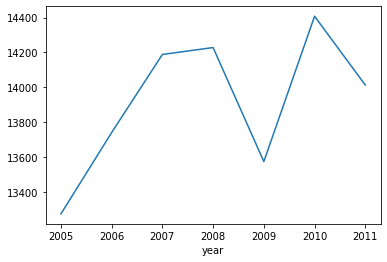

In [52]:
m['gdp'].plot()

<AxesSubplot:ylabel='Frequency'>

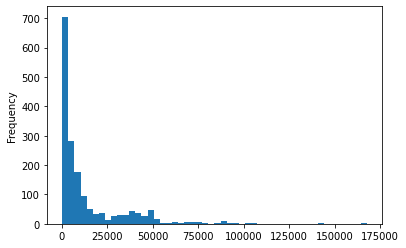

In [53]:
data['gdp'].plot.hist(bins=50)

# stack /unstack et multindex

In [54]:
# creation du multiindex
data2 = data.iloc[:200][['country', 'year', 'gdp']]
data2.set_index([ 'country','year', ], inplace=True)
data2


gdp
country                    year             
Arab World                 2011  5990.917180
                           2010  5918.315891
                           2009  5785.710406
                           2008  5899.879787
                           2007  5715.905696
...                                      ...
Lower middle income        2005  1318.673372
Middle East & North Africa 2011  7234.311308
                           2010  7126.771934
                           2009  6933.149464
                           2008  7046.009046

[200 rows x 1 columns]

In [55]:
data3 = data2.unstack('year')
data3

gdp  \
year                                                        2005   
country                                                            
Arab World                                           5384.848325   
Caribbean small states                               8566.189483   
Central Europe and the Baltics                      10703.528188   
Early-demographic dividend                           2526.189304   
East Asia & Pacific                                  6295.724615   
East Asia & Pacific (IDA & IBRD countries)           2638.839441   
East Asia & Pacific (excluding high income)          2610.674116   
Euro area                                           36845.650760   
Europe & Central Asia                               22471.426398   
Europe & Central Asia (IDA & IBRD countries)         6920.679077   
Europe & Central Asia (excluding high income)        6556.835974   
European Union                                      32752.171572   
Fragile and conflict affected situations             1273.515405   
Heavily indebted poor countries (HIPC)                652.977319   
High income                                         37523.142446   
IBRD only                                            3491.927552   
IDA & IBRD total                                     2905.991821   
IDA blend                                            1329.118177   
IDA only                                              670.446173   
IDA total                                             892.515158   
Late-demographic dividend                            4551.004483   
Latin America & Caribbean                            7955.172321   
Latin America & Caribbean (excluding high income)    7592.878953   
Latin America & the Caribbean (IDA & IBRD count...   7852.028845   
Least developed countries: UN classification          636.063528   
Low & middle income                                  2764.487617   
Low income                                            559.228275   
Lower middle income                                  1318.673372   
Middle East & North Africa                                   NaN   

                                                                  \
year                                                        2006   
country                                                            
Arab World                                           5601.023733   
Caribbean small states                               9089.439105   
Central Europe and the Baltics                      11436.079083   
Early-demographic dividend                           2643.236636   
East Asia & Pacific                                  6596.032678   
East Asia & Pacific (IDA & IBRD countries)           2900.723729   
East Asia & Pacific (excluding high income)          2869.772319   
Euro area                                           37861.104040   
Europe & Central Asia                               23284.684684   
Europe & Central Asia (IDA & IBRD countries)         7453.854606   
Europe & Central Asia (excluding high income)        7080.925626   
European Union                                      33722.533998   
Fragile and conflict affected situations             1325.833121   
Heavily indebted poor countries (HIPC)                673.166020   
High income                                         38371.066390   
IBRD only                                            3732.618610   
IDA & IBRD total                                     3093.991500   
IDA blend                                            1377.113531   
IDA only                                              698.138406   
IDA total                                             926.760514   
Late-demographic dividend                            4917.846340   
Latin America & Caribbean                            8268.717574   
Latin America & Caribbean (excluding high income)    7877.654253   
Latin America & the Caribbean (IDA & IBRD count...   8166.087692   
Least developed countries: UN classification    

# merge/concat/alignement

pd.concat permet de concatener des tableaux

Attention pandas aligne tout seul data en fonction des l'index.
Il remplit tout seul les missing values.


In [56]:
m1 = pd.DataFrame(np.arange(15).reshape(5,3), columns=['a', 'b', 'c'], index=[12., 12.8, 14.2, 21.2, 4.])
display(m1)
m2 = pd.DataFrame(np.arange(9).reshape(3,3), columns=['b', 'c', 'd'], index=[15., 23., 18.3])
display(m2)

,a,b,c
12.0,0,1,2
12.8,3,4,5
14.2,6,7,8
21.2,9,10,11
4.0,12,13,14


,b,c,d
15.0,0,1,2
23.0,3,4,5
18.3,6,7,8


In [57]:
pd.concat([m1,m2], axis=0)

,a,b,c,d
12.0,0.0,1,2,NaN
12.8,3.0,4,5,NaN
14.2,6.0,7,8,NaN
21.2,9.0,10,11,NaN
4.0,12.0,13,14,NaN
15.0,NaN,0,1,2.0
23.0,NaN,3,4,5.0
18.3,NaN,6,7,8.0
